In [0]:
## import pacckages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [11]:
## load data
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data = df[['#Passengers']].values
data.shape

(144, 1)

In [0]:
## preeprocessinh
sc = MinMaxScaler(feature_range=(0,1))

data_scaled = sc.fit_transform(data)

In [15]:
print('data max : ',data_scaled.max())

data max :  1.0


In [0]:
# split data
X_data = []
y_data = []

look_back =1

for i in range(len(data_scaled) -1):
  X_data.append(data_scaled[i:(i +look_back),0])
  y_data.append(data_scaled[i +look_back,0])

X_data, y_data = np.array(X_data), np.array(y_data)

In [20]:
X_data.shape

(143, 1)

In [21]:
#reshaping
X_data = np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))
X_data.shape

(143, 1, 1)

In [24]:
y_data = np.reshape(y_data,(y_data.shape[0],1))
y_data.shape

(143, 1)

In [0]:
## split data into Train and Test
tarin_size = int(len(X_data)*0.7)
test_size = len(X_data) - tarin_size

X_train = X_data[0:tarin_size,:]
X_test  = X_data[tarin_size:len(X_data),:]
y_train = y_data[0:tarin_size]
y_test  = y_data[tarin_size:len(X_data)]

In [55]:
X_train.shape

(100, 1, 1)

In [29]:
y_train.shape

(100, 1)

In [30]:
X_test.shape

(43, 1, 1)

In [31]:
y_test.shape

(43, 1)

In [0]:
## build model RNN
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))

## output layerr
model.add(Dense(units=1))



In [0]:
## compile model
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
## fiiting model
model.fit(X_train,y_train,batch_size=16, epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 5/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 8/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 9/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 11/200
7/7 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 12/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 13/200
7/7 [==============================] - 0s 4ms/st

In [42]:
## evaluate model
test_loss   = model.evaluate(X_test,y_test)

print(f'test loss {test_loss} ')

2/2 [==============================] - 0s 2ms/step - loss: 0.0096
test loss 0.009643182158470154 


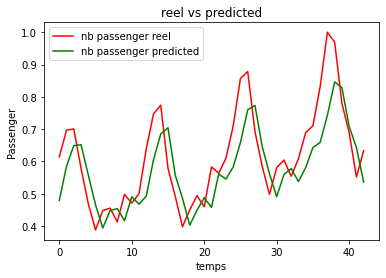

In [43]:
## plott result
plt.plot(y_test,color='red',label='nb passenger reel')
plt.plot(model.predict(X_test),color='green',label='nb passenger predicted')
plt.title('reel vs predicted')
plt.xlabel('temps')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [0]:
X_new = np.array([122,122])
X_new = np.reshape(X_new,(X_new.shape[0],1,1))

y_new_pred = model.predict(X_new) 

In [53]:
y_new_pred

array([[1.425635],
       [1.425635]], dtype=float32)